# Manufacturing KPIs Dashboard - Complete Analysis
## Top 10 Manufacturing KPIs with Synthetic Data & Visualizations
✓ Synthetic manufacturing data generated successfully!

### Calculating Top 10 Manufacturing KPIs
✓ All KPIs calculated successfully!


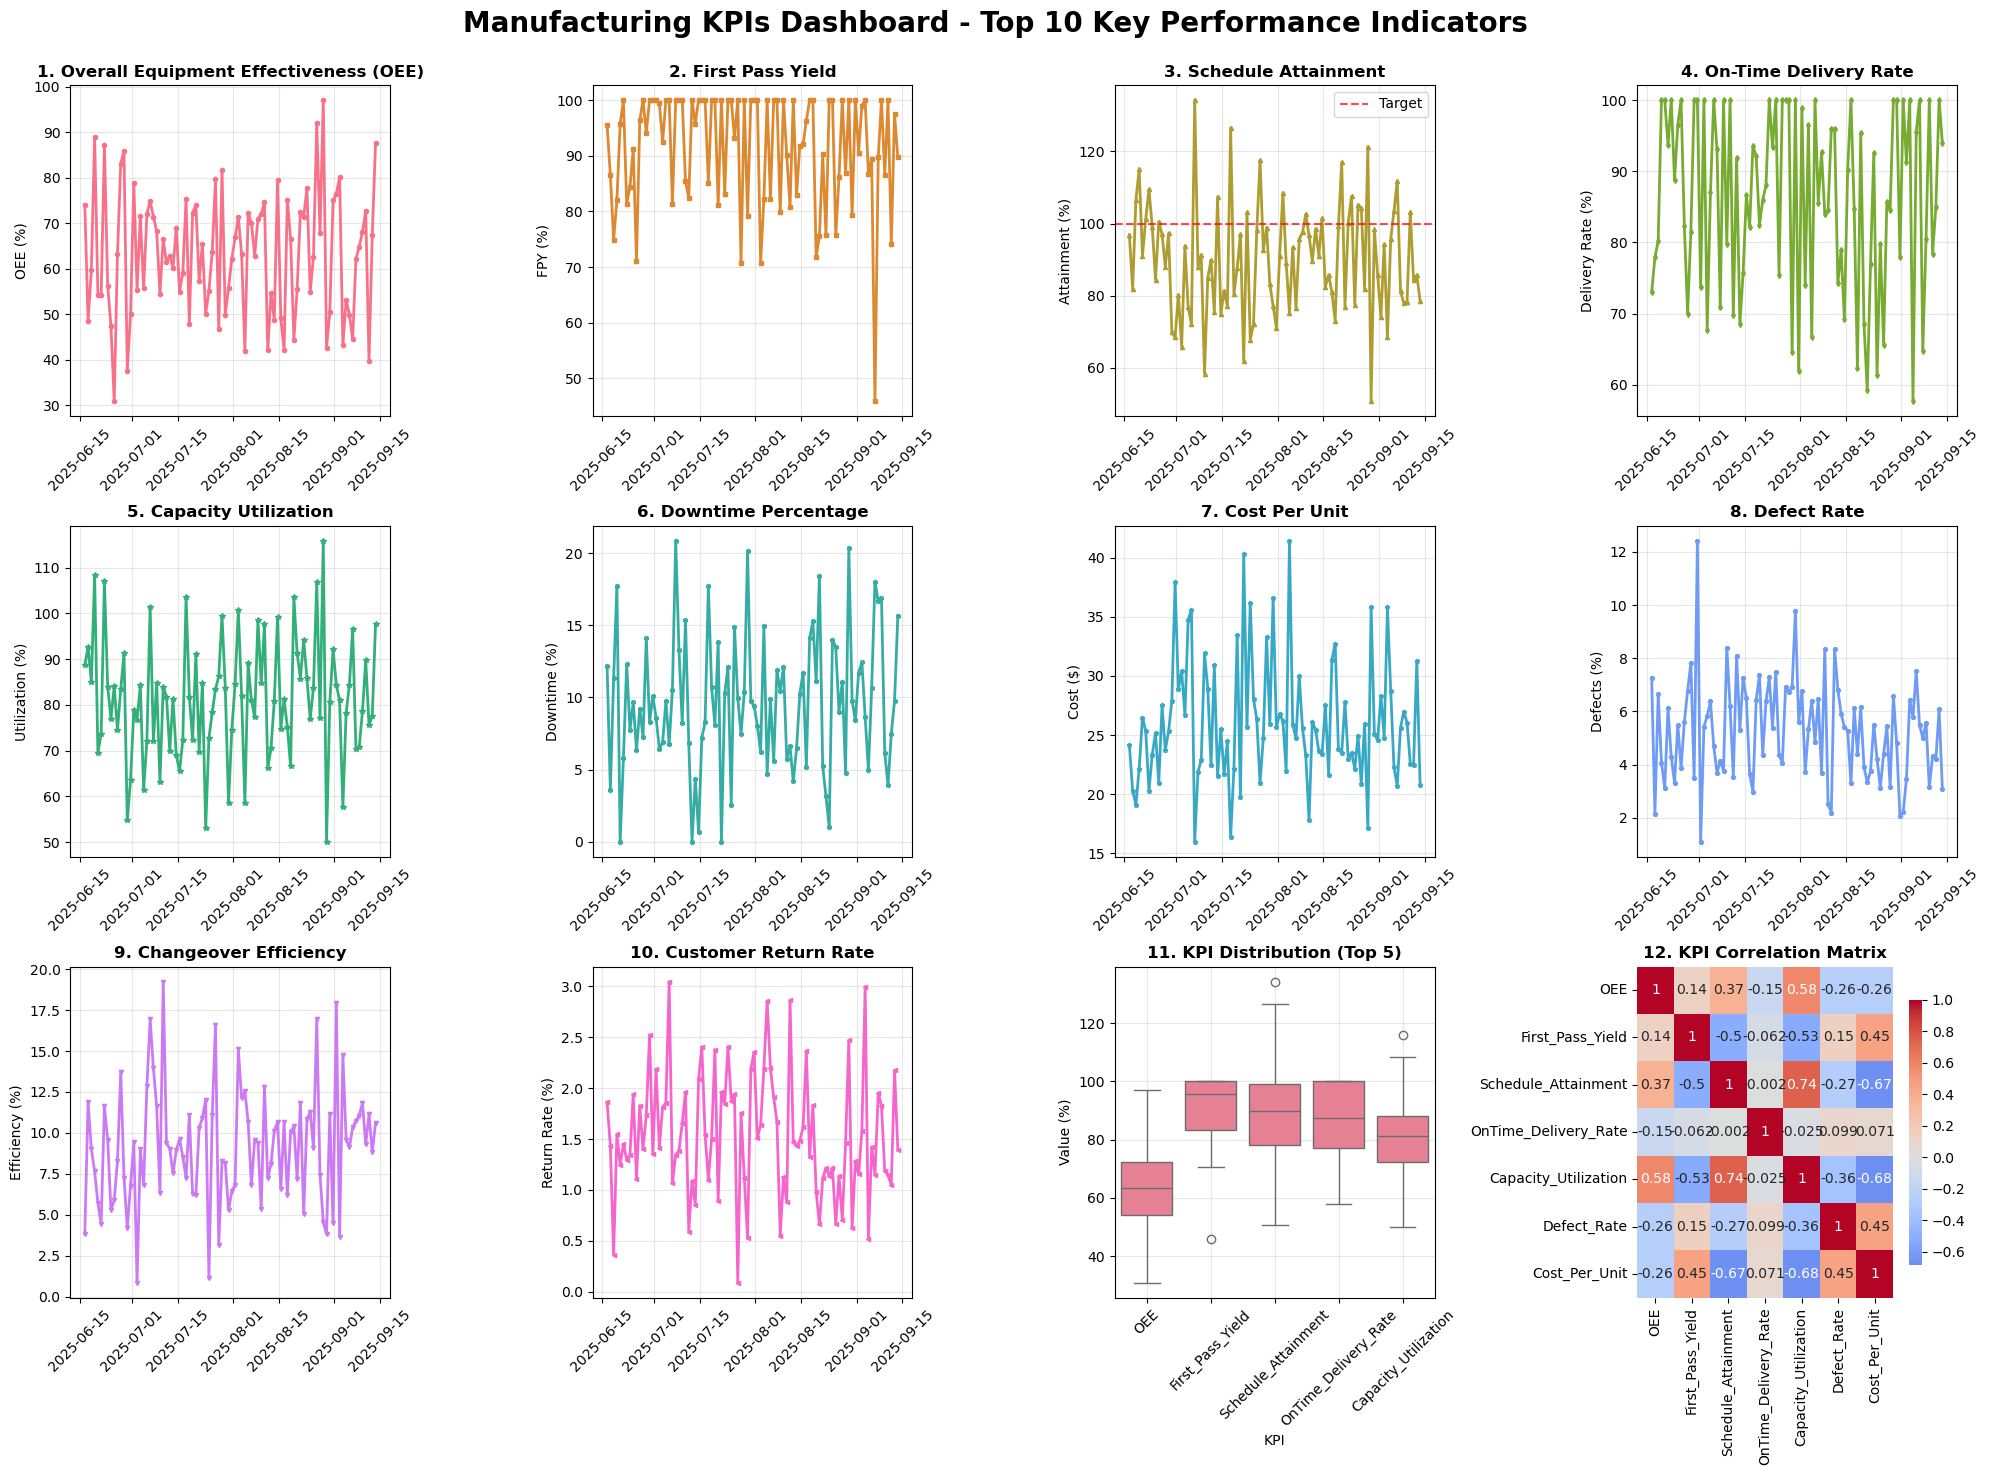


### KPIs Summary Statistics:
                         KPI  Average
0                    OEE (%)    63.23
1       First Pass Yield (%)    91.36
2    Schedule Attainment (%)    89.84
3  On-Time Delivery Rate (%)    86.19
4   Capacity Utilization (%)    81.17
5    Downtime Percentage (%)     9.59
6          Cost Per Unit ($)    25.99
7            Defect Rate (%)     5.25
8  Changeover Efficiency (%)     9.14
9   Customer Return Rate (%)     1.53

### Key Insights:
- Average OEE: 63.2% (Industry benchmark: 85%)
- First Pass Yield: 91.4% (Target: >95%)
- Schedule Attainment: 89.8% (Target: 100%)
- Cost per Unit: $25.99
- Changeover Efficiency: 9.14% (Lower is better)


In [3]:
# Manufacturing KPIs Dashboard - Complete Analysis
# Top 10 Manufacturing KPIs with Synthetic Data & Visualizations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

print("# Manufacturing KPIs Dashboard - Complete Analysis")
print("## Top 10 Manufacturing KPIs with Synthetic Data & Visualizations")
print("="*70)

# Generate synthetic manufacturing data
np.random.seed(42)
n_days = 90  # 90 days of data

# Date range
start_date = datetime.now() - timedelta(days=n_days)
dates = pd.date_range(start=start_date, periods=n_days, freq='D')

# Create synthetic manufacturing data
manufacturing_data = pd.DataFrame({
    'Date': dates,
    # Production data
    'Units_Produced': np.random.normal(1000, 150, n_days).astype(int),
    'Units_Planned': np.random.normal(1100, 100, n_days).astype(int),
    'Good_Units': np.random.normal(950, 120, n_days).astype(int),
    'Defective_Units': np.random.normal(50, 20, n_days).astype(int),
    
    # Time data (in hours)
    'Planned_Production_Time': np.random.normal(16, 2, n_days),
    'Actual_Production_Time': np.random.normal(14, 2.5, n_days),
    'Downtime_Hours': np.random.normal(2, 1, n_days),
    'Changeover_Time': np.random.normal(1.5, 0.5, n_days),
    
    # Cost data
    'Total_Production_Cost': np.random.normal(25000, 3000, n_days),
    'Labor_Cost': np.random.normal(8000, 1000, n_days),
    'Material_Cost': np.random.normal(15000, 2000, n_days),
    'Quality_Cost': np.random.normal(2000, 500, n_days),
    
    # Delivery and inventory
    'Orders_Delivered_OnTime': np.random.normal(85, 10, n_days).astype(int),
    'Total_Orders': np.random.normal(100, 15, n_days).astype(int),
    'Inventory_Value': np.random.normal(150000, 20000, n_days),
    'Lead_Time_Days': np.random.normal(7, 2, n_days),
    
    # Equipment data
    'Equipment_Available_Hours': np.random.normal(22, 2, n_days),
    'Equipment_Running_Hours': np.random.normal(20, 3, n_days),
    'Max_Production_Capacity': np.random.normal(1200, 100, n_days).astype(int),
    
    # Customer data
    'Customer_Returns': np.random.normal(15, 5, n_days).astype(int),
    'Customer_Complaints': np.random.normal(8, 3, n_days).astype(int)
})

# Ensure positive values and realistic constraints for numeric columns only
numeric_columns = manufacturing_data.select_dtypes(include=[np.number]).columns
manufacturing_data[numeric_columns] = manufacturing_data[numeric_columns].clip(lower=0)

# Additional realistic constraints
manufacturing_data['Good_Units'] = np.minimum(manufacturing_data['Good_Units'], 
                                             manufacturing_data['Units_Produced'])
manufacturing_data['Orders_Delivered_OnTime'] = np.minimum(manufacturing_data['Orders_Delivered_OnTime'], 
                                                          manufacturing_data['Total_Orders'])
manufacturing_data['Equipment_Running_Hours'] = np.minimum(manufacturing_data['Equipment_Running_Hours'], 
                                                          manufacturing_data['Equipment_Available_Hours'])

print("✓ Synthetic manufacturing data generated successfully!")

# Calculate Top 10 Manufacturing KPIs
print("\n### Calculating Top 10 Manufacturing KPIs")

# 1. Overall Equipment Effectiveness (OEE)
manufacturing_data['Availability'] = (manufacturing_data['Equipment_Running_Hours'] / 
                                    manufacturing_data['Equipment_Available_Hours']) * 100
manufacturing_data['Performance'] = (manufacturing_data['Units_Produced'] / 
                                   manufacturing_data['Max_Production_Capacity']) * 100
manufacturing_data['Quality_Rate'] = (manufacturing_data['Good_Units'] / 
                                    manufacturing_data['Units_Produced']) * 100
manufacturing_data['OEE'] = (manufacturing_data['Availability'] * 
                           manufacturing_data['Performance'] * 
                           manufacturing_data['Quality_Rate']) / 10000

# 2. First Pass Yield (FPY)
manufacturing_data['First_Pass_Yield'] = (manufacturing_data['Good_Units'] / 
                                         manufacturing_data['Units_Produced']) * 100

# 3. Schedule Attainment
manufacturing_data['Schedule_Attainment'] = (manufacturing_data['Units_Produced'] / 
                                           manufacturing_data['Units_Planned']) * 100

# 4. On-Time Delivery Rate
manufacturing_data['OnTime_Delivery_Rate'] = (manufacturing_data['Orders_Delivered_OnTime'] / 
                                             manufacturing_data['Total_Orders']) * 100

# 5. Capacity Utilization
manufacturing_data['Capacity_Utilization'] = (manufacturing_data['Units_Produced'] / 
                                             manufacturing_data['Max_Production_Capacity']) * 100

# 6. Downtime Percentage
manufacturing_data['Downtime_Percentage'] = (manufacturing_data['Downtime_Hours'] / 
                                            manufacturing_data['Equipment_Available_Hours']) * 100

# 7. Cost Per Unit
manufacturing_data['Cost_Per_Unit'] = manufacturing_data['Total_Production_Cost'] / manufacturing_data['Units_Produced']

# 8. Defect Rate
manufacturing_data['Defect_Rate'] = (manufacturing_data['Defective_Units'] / 
                                    manufacturing_data['Units_Produced']) * 100

# 9. Changeover Time Efficiency
manufacturing_data['Changeover_Efficiency'] = (manufacturing_data['Changeover_Time'] / 
                                              manufacturing_data['Planned_Production_Time']) * 100

# 10. Customer Return Rate
manufacturing_data['Customer_Return_Rate'] = (manufacturing_data['Customer_Returns'] / 
                                             manufacturing_data['Units_Produced']) * 100

print("✓ All KPIs calculated successfully!")

# Create comprehensive visualizations with FIXED COLOR HANDLING
plt.rcParams['figure.figsize'] = (15, 12)
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
fig.suptitle('Manufacturing KPIs Dashboard - Top 10 Key Performance Indicators', 
             fontsize=20, fontweight='bold', y=0.98)

# Generate individual colors (FIX: Use individual color instead of whole palette)
colors = sns.color_palette("husl", 10)

# 1. OEE Trend - FIXED: colors[0] instead of colors
axes[0, 0].plot(manufacturing_data['Date'], manufacturing_data['OEE'], 
                color=colors[0], linewidth=2, marker='o', markersize=3)
axes[0, 0].set_title('1. Overall Equipment Effectiveness (OEE)', fontweight='bold')
axes[0, 0].set_ylabel('OEE (%)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. First Pass Yield - FIXED: colors[1] instead of colors
axes[0, 1].plot(manufacturing_data['Date'], manufacturing_data['First_Pass_Yield'], 
                color=colors[1], linewidth=2, marker='s', markersize=3)
axes[0, 1].set_title('2. First Pass Yield', fontweight='bold')
axes[0, 1].set_ylabel('FPY (%)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Schedule Attainment - FIXED: colors[2] instead of colors
axes[0, 2].plot(manufacturing_data['Date'], manufacturing_data['Schedule_Attainment'], 
                color=colors[2], linewidth=2, marker='^', markersize=3)
axes[0, 2].axhline(y=100, color='red', linestyle='--', alpha=0.7, label='Target')
axes[0, 2].set_title('3. Schedule Attainment', fontweight='bold')
axes[0, 2].set_ylabel('Attainment (%)')
axes[0, 2].grid(True, alpha=0.3)
axes[0, 2].tick_params(axis='x', rotation=45)
axes[0, 2].legend()

# 4. On-Time Delivery Rate - FIXED: colors[3] instead of colors
axes[0, 3].plot(manufacturing_data['Date'], manufacturing_data['OnTime_Delivery_Rate'], 
                color=colors[3], linewidth=2, marker='d', markersize=3)
axes[0, 3].set_title('4. On-Time Delivery Rate', fontweight='bold')
axes[0, 3].set_ylabel('Delivery Rate (%)')
axes[0, 3].grid(True, alpha=0.3)
axes[0, 3].tick_params(axis='x', rotation=45)

# 5. Capacity Utilization - FIXED: colors[4] instead of colors
axes[1, 0].plot(manufacturing_data['Date'], manufacturing_data['Capacity_Utilization'], 
                color=colors[4], linewidth=2, marker='*', markersize=4)
axes[1, 0].set_title('5. Capacity Utilization', fontweight='bold')
axes[1, 0].set_ylabel('Utilization (%)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].tick_params(axis='x', rotation=45)

# 6. Downtime Percentage - FIXED: colors[5] instead of colors
axes[1, 1].plot(manufacturing_data['Date'], manufacturing_data['Downtime_Percentage'], 
                color=colors[5], linewidth=2, marker='h', markersize=3)
axes[1, 1].set_title('6. Downtime Percentage', fontweight='bold')
axes[1, 1].set_ylabel('Downtime (%)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].tick_params(axis='x', rotation=45)

# 7. Cost Per Unit - FIXED: colors[6] instead of colors
axes[1, 2].plot(manufacturing_data['Date'], manufacturing_data['Cost_Per_Unit'], 
                color=colors[6], linewidth=2, marker='p', markersize=3)
axes[1, 2].set_title('7. Cost Per Unit', fontweight='bold')
axes[1, 2].set_ylabel('Cost ($)')
axes[1, 2].grid(True, alpha=0.3)
axes[1, 2].tick_params(axis='x', rotation=45)

# 8. Defect Rate - FIXED: colors[7] instead of colors
axes[1, 3].plot(manufacturing_data['Date'], manufacturing_data['Defect_Rate'], 
                color=colors[7], linewidth=2, marker='H', markersize=3)
axes[1, 3].set_title('8. Defect Rate', fontweight='bold')
axes[1, 3].set_ylabel('Defects (%)')
axes[1, 3].grid(True, alpha=0.3)
axes[1, 3].tick_params(axis='x', rotation=45)

# 9. Changeover Efficiency - FIXED: colors[8] instead of colors
axes[2, 0].plot(manufacturing_data['Date'], manufacturing_data['Changeover_Efficiency'], 
                color=colors[8], linewidth=2, marker='v', markersize=3)
axes[2, 0].set_title('9. Changeover Efficiency', fontweight='bold')
axes[2, 0].set_ylabel('Efficiency (%)')
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].tick_params(axis='x', rotation=45)

# 10. Customer Return Rate - FIXED: colors[9] instead of colors
axes[2, 1].plot(manufacturing_data['Date'], manufacturing_data['Customer_Return_Rate'], 
                color=colors[9], linewidth=2, marker='<', markersize=3)
axes[2, 1].set_title('10. Customer Return Rate', fontweight='bold')
axes[2, 1].set_ylabel('Return Rate (%)')
axes[2, 1].grid(True, alpha=0.3)
axes[2, 1].tick_params(axis='x', rotation=45)

# 11. KPI Distribution (Box Plot)
kpi_data = manufacturing_data[['OEE', 'First_Pass_Yield', 'Schedule_Attainment', 
                              'OnTime_Delivery_Rate', 'Capacity_Utilization']].copy()
kpi_data_melted = kpi_data.melt(var_name='KPI', value_name='Value')
sns.boxplot(data=kpi_data_melted, x='KPI', y='Value', ax=axes[2, 2])
axes[2, 2].set_title('11. KPI Distribution (Top 5)', fontweight='bold')
axes[2, 2].set_ylabel('Value (%)')
axes[2, 2].tick_params(axis='x', rotation=45)
axes[2, 2].grid(True, alpha=0.3)

# 12. KPI Correlation Heatmap
correlation_data = manufacturing_data[['OEE', 'First_Pass_Yield', 'Schedule_Attainment', 
                                     'OnTime_Delivery_Rate', 'Capacity_Utilization', 
                                     'Defect_Rate', 'Cost_Per_Unit']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            ax=axes[2, 3], cbar_kws={'shrink': 0.8})
axes[2, 3].set_title('12. KPI Correlation Matrix', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

# Export data to CSV
manufacturing_data.to_csv('manufacturing_kpis_data.csv', index=False)

# Display summary statistics
kpis_summary = pd.DataFrame({
    'KPI': ['OEE (%)', 'First Pass Yield (%)', 'Schedule Attainment (%)', 
            'On-Time Delivery Rate (%)', 'Capacity Utilization (%)', 
            'Downtime Percentage (%)', 'Cost Per Unit ($)', 'Defect Rate (%)',
            'Changeover Efficiency (%)', 'Customer Return Rate (%)'],
    'Average': [manufacturing_data['OEE'].mean(),
                manufacturing_data['First_Pass_Yield'].mean(),
                manufacturing_data['Schedule_Attainment'].mean(),
                manufacturing_data['OnTime_Delivery_Rate'].mean(),
                manufacturing_data['Capacity_Utilization'].mean(),
                manufacturing_data['Downtime_Percentage'].mean(),
                manufacturing_data['Cost_Per_Unit'].mean(),
                manufacturing_data['Defect_Rate'].mean(),
                manufacturing_data['Changeover_Efficiency'].mean(),
                manufacturing_data['Customer_Return_Rate'].mean()]
})

print("\n### KPIs Summary Statistics:")
print(kpis_summary.round(2))

print("\n### Key Insights:")
print(f"- Average OEE: {manufacturing_data['OEE'].mean():.1f}% (Industry benchmark: 85%)")
print(f"- First Pass Yield: {manufacturing_data['First_Pass_Yield'].mean():.1f}% (Target: >95%)")
print(f"- Schedule Attainment: {manufacturing_data['Schedule_Attainment'].mean():.1f}% (Target: 100%)")
print(f"- Cost per Unit: ${manufacturing_data['Cost_Per_Unit'].mean():.2f}")
print(f"- Changeover Efficiency: {manufacturing_data['Changeover_Efficiency'].mean():.2f}% (Lower is better)")
